# Load required Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# Dataset: ECG heartbeats from the LTAF database

### References
- [1] https://academic.oup.com/europace/article/9/7/466/553888

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


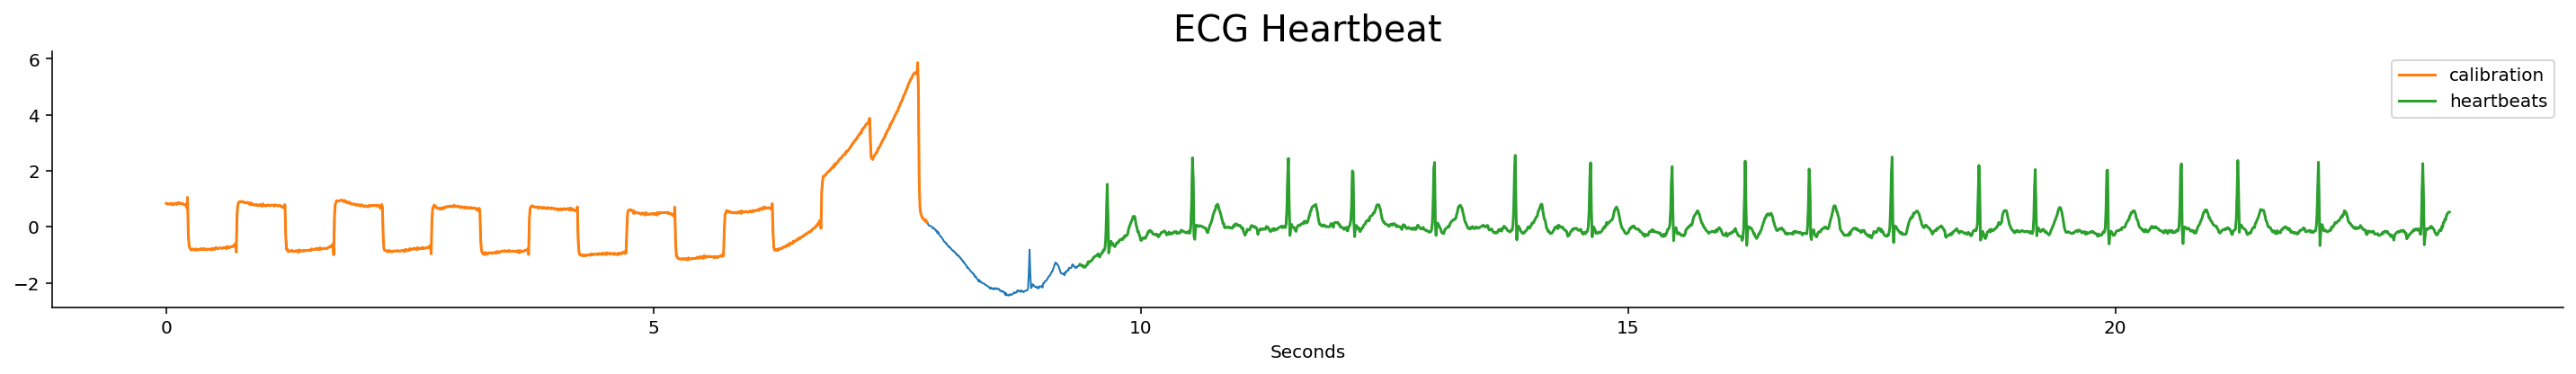

In [2]:
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.46it/s]


Motif Length: 12 	 0.09375 	AU_PEF: 0.361 	#Elbows: 5


Compute ks: 100%|█████████████████████████████████████████████████| 18/18 [00:00<00:00, 125.62it/s]


Motif Length: 25 	 0.1953125 	AU_PEF: 0.4 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:00<00:00, 83.07it/s]


Motif Length: 37 	 0.2890625 	AU_PEF: 0.36 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:00<00:00, 70.50it/s]


Motif Length: 50 	 0.390625 	AU_PEF: 0.279 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:00<00:00, 69.98it/s]


Motif Length: 62 	 0.484375 	AU_PEF: 0.267 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:00<00:00, 61.07it/s]


Motif Length: 75 	 0.5859375 	AU_PEF: 0.375 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:00<00:00, 50.29it/s]


Motif Length: 87 	 0.6796875 	AU_PEF: 0.462 	#Elbows: 4


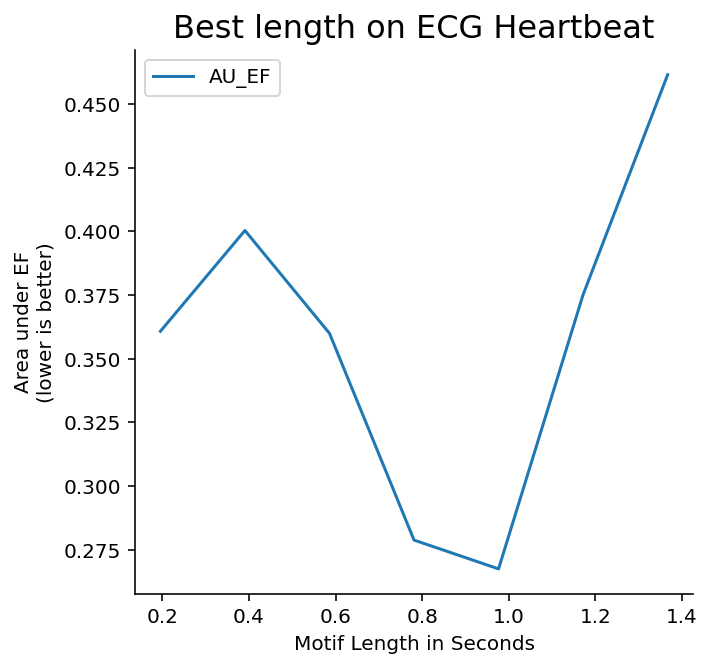

In [3]:
ks = 20
length_range = np.arange(25,200,25) 
motif_length = plot_motif_length_selection(
    ks, series, file, 
    motif_length_range=length_range, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:01<00:00,  9.95it/s]


Chosen window-size: 125
Identified Elbow Points [ 6  9 16]
Filtered Elbow Points [6, 16]


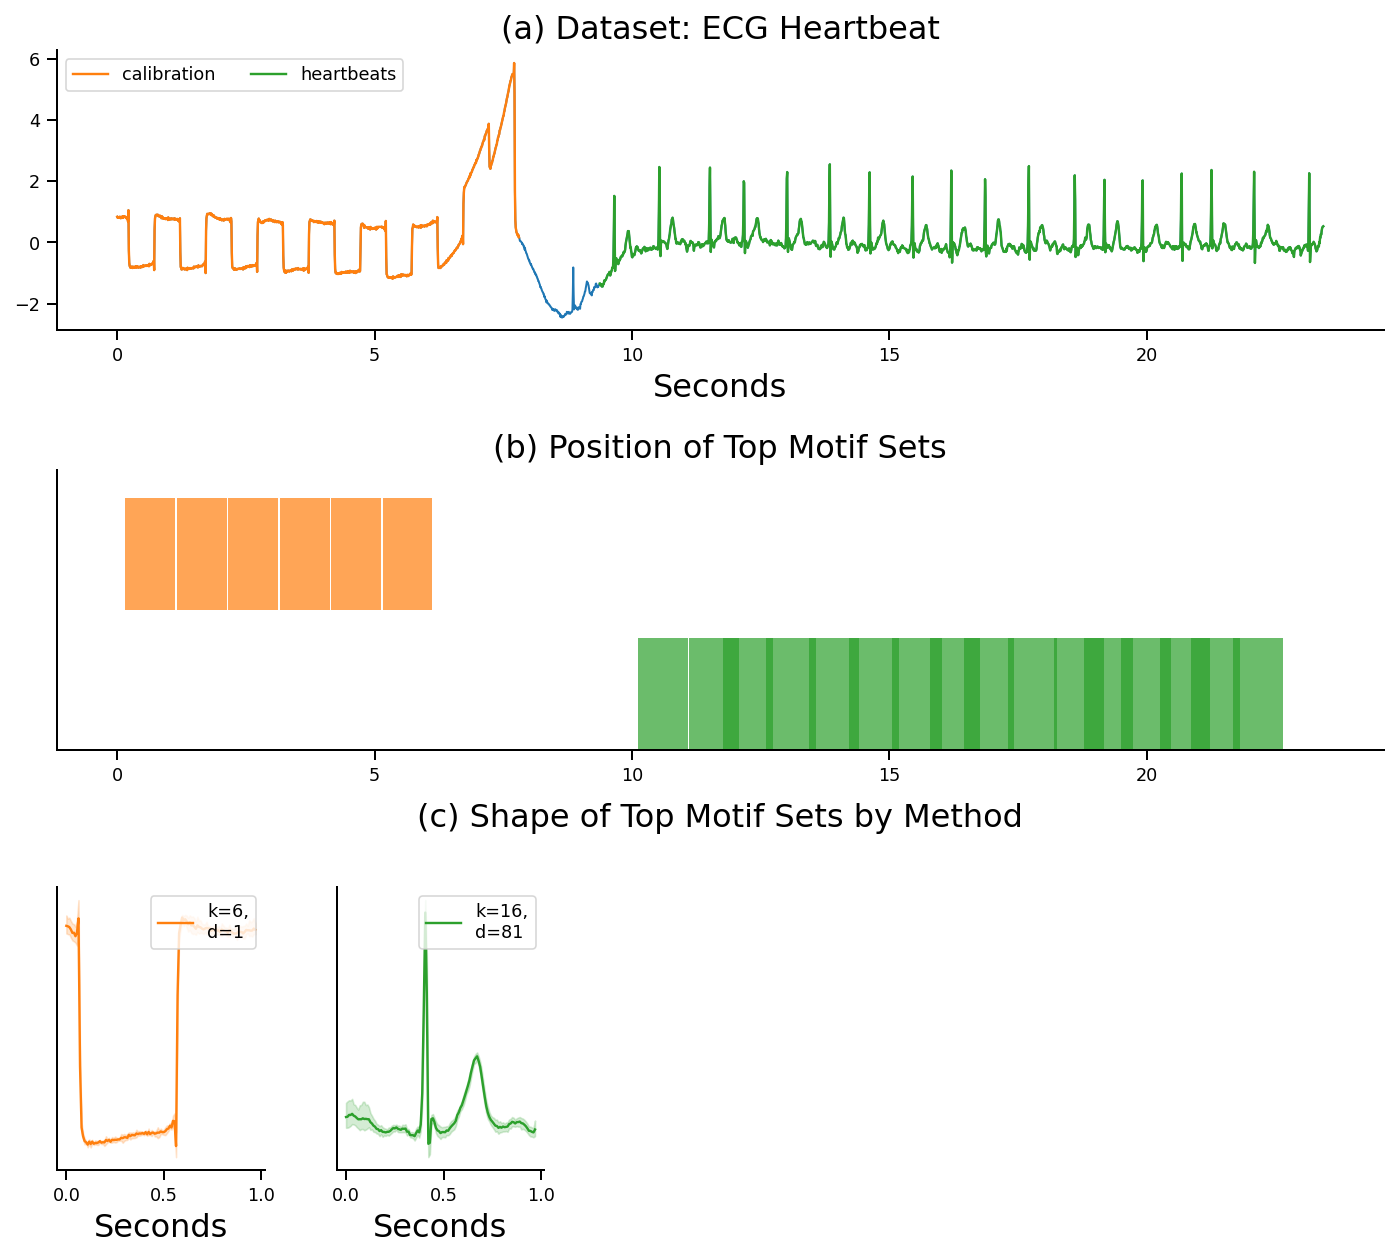

In [4]:
#ks = 20
#motif_length=125
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    ds_name=ds_name, 
    motif_length=motif_length,
    ground_truth=df_gt)

<hr>

# Dataset: Muscle Activation Dataset

### References
- [1] https://link.springer.com/content/pdf/10.1007/s10618-007-0070-1.pdf
- [2] http://www.cs.ucr.edu/~eamonn/iSAX/iSAX.html

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


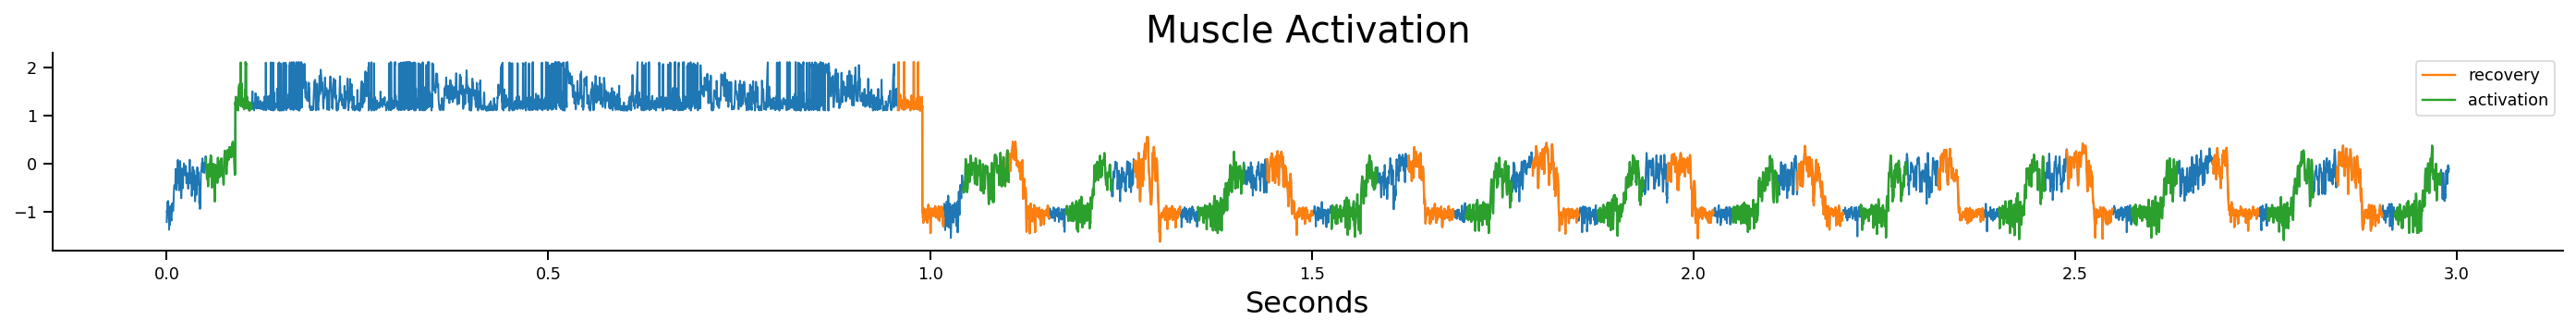

In [5]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"

series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

## Motif-Length Selection

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:02<00:00,  6.11it/s]


Motif Length: 200 	 0.04 	AU_PEF: 0.212 	#Elbows: 3


Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:02<00:00,  5.25it/s]


Motif Length: 250 	 0.05 	AU_PEF: 0.212 	#Elbows: 1


Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.42it/s]


Motif Length: 300 	 0.06 	AU_PEF: 0.179 	#Elbows: 2


Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.94it/s]


Motif Length: 350 	 0.07 	AU_PEF: 0.185 	#Elbows: 2


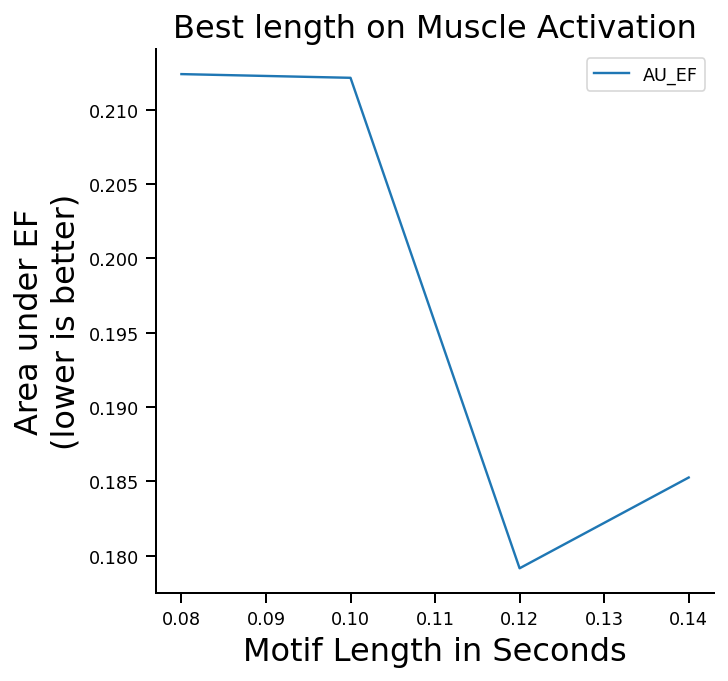

In [6]:
k = 15
length_range = np.arange(400,701,100) 

motif_length = plot_motif_length_selection(
    k, series, file, length_range, ds_name=ds_name)

## Top-1 k-Motiflets

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:11<00:00,  1.10it/s]


Chosen window-size: 600
Identified Elbow Points [ 9 12]
Filtered Elbow Points [12]


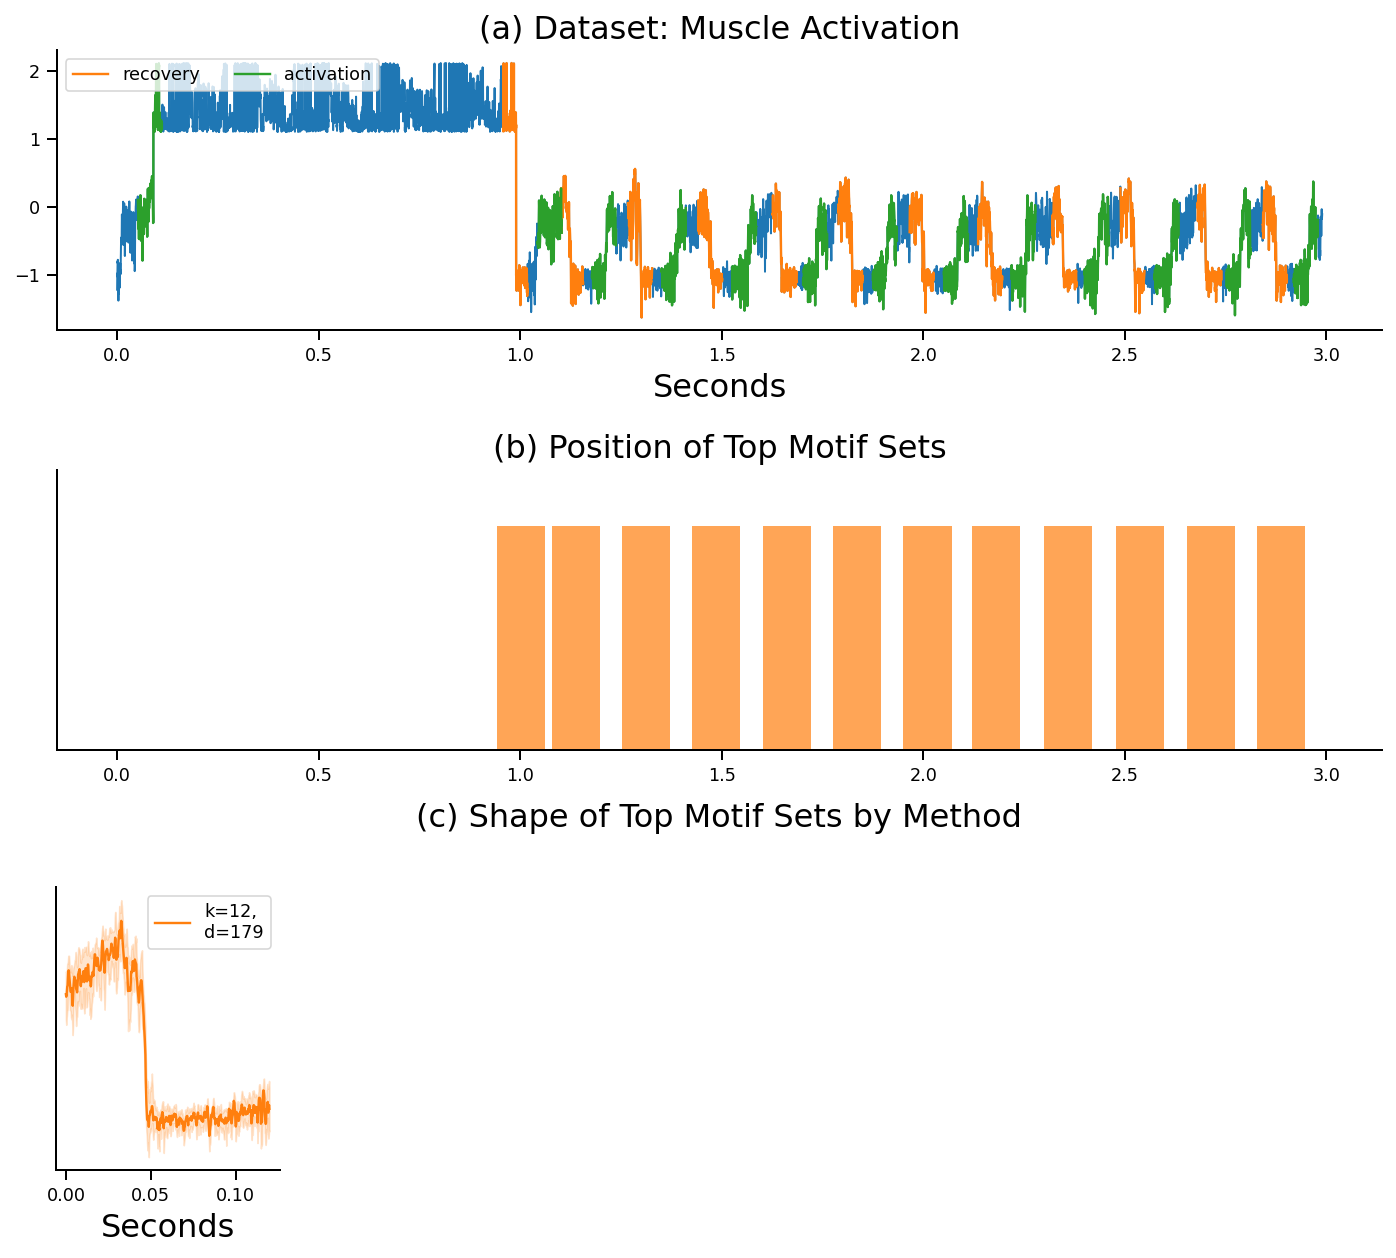

In [7]:
dists, candidates, elbow_points = plot_elbow(
    k, series, file, ds_name=ds_name,
    motif_length=motif_length, ground_truth=df_gt)

## Top-2 k-Motiflets

Compute ks: 100%|██████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.69it/s]


Chosen window-size: 600
Identified Elbow Points [ 8 11]
Filtered Elbow Points [11]


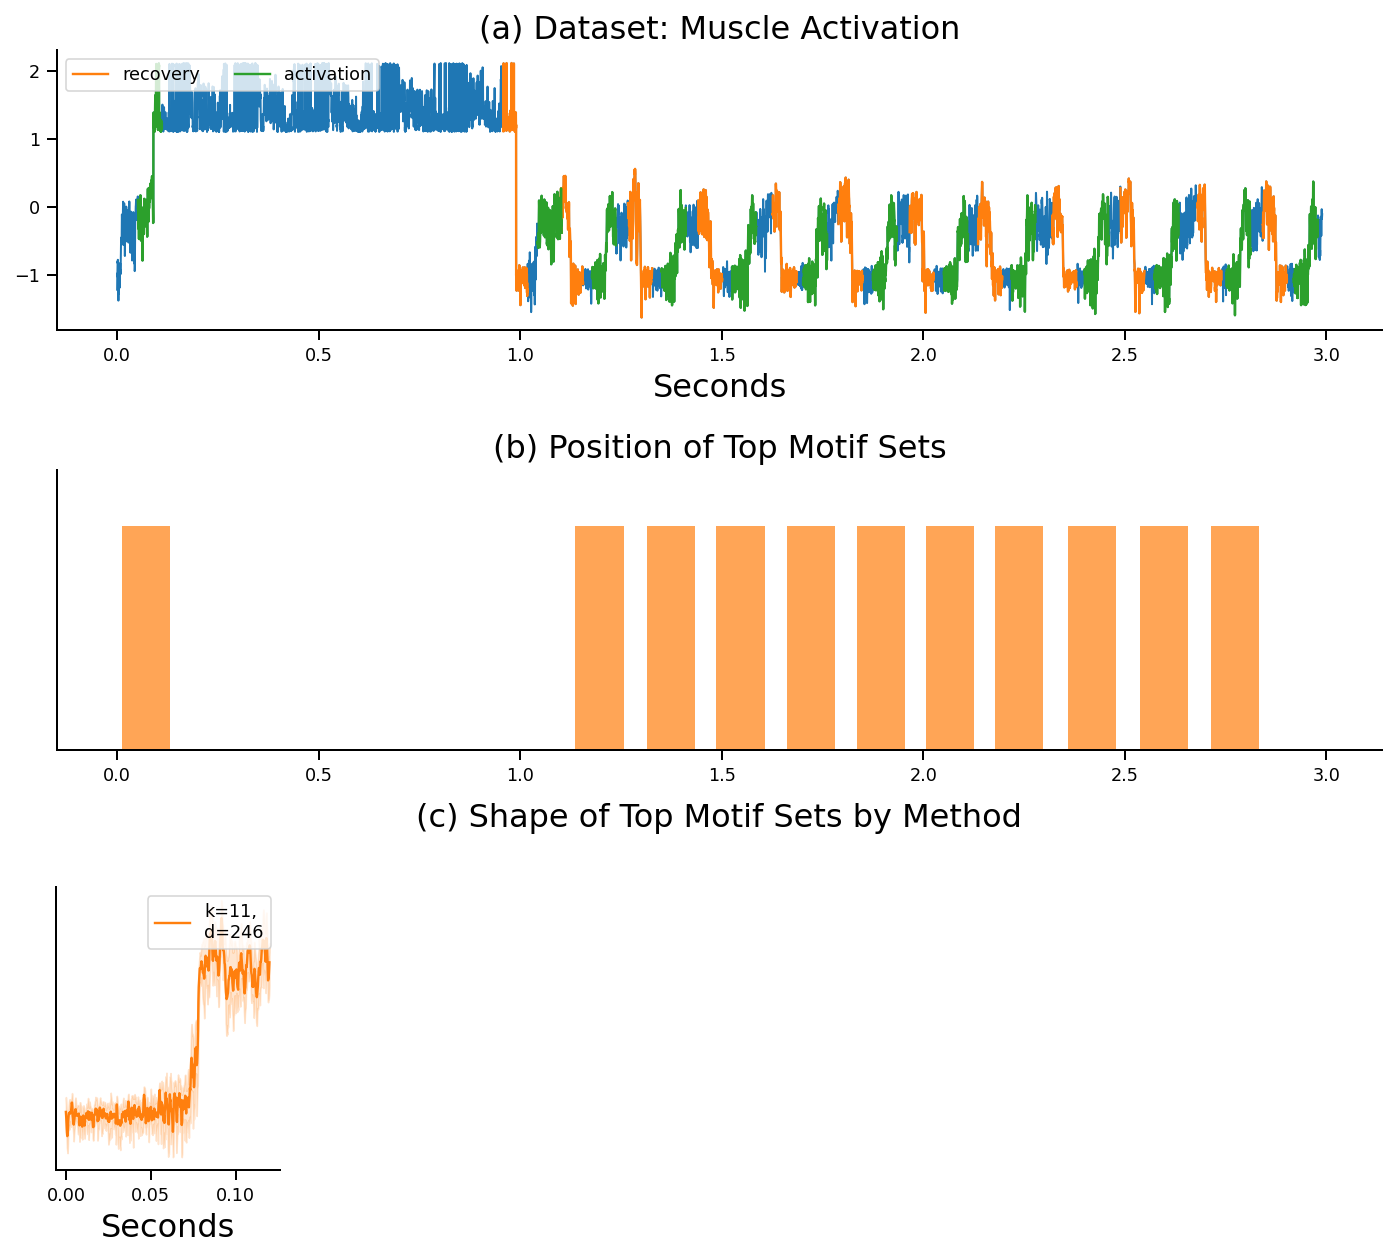

In [8]:
dists2, candidates2, elbow_points2 = plot_elbow(
    k, series, file, ds_name=ds_name, 
    exclusion=candidates, motif_length=motif_length, ground_truth=df_gt)

<hr>

# Dataset: Physiodata - EEG sleep data
    
### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


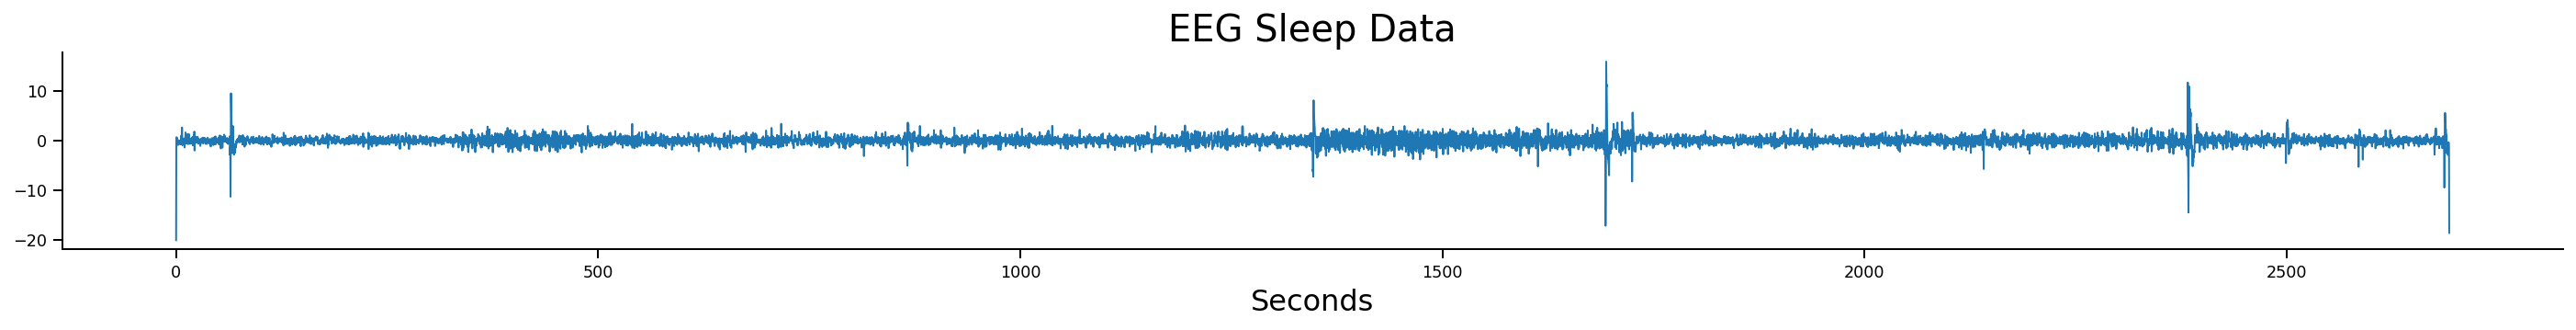

In [9]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.83it/s]


Motif Length: 7 	 1.82 	AU_PEF: 0.498 	#Elbows: 3


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.53it/s]


Motif Length: 12 	 3.12 	AU_PEF: 0.548 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.70it/s]


Motif Length: 17 	 4.42 	AU_PEF: 0.511 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.72it/s]


Motif Length: 22 	 5.72 	AU_PEF: 0.514 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.74it/s]


Motif Length: 27 	 7.02 	AU_PEF: 0.531 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.64it/s]


Motif Length: 32 	 8.32 	AU_PEF: 0.52 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.67it/s]


Motif Length: 37 	 9.62 	AU_PEF: 0.54 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.66it/s]


Motif Length: 42 	 10.92 	AU_PEF: 0.538 	#Elbows: 3


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.72it/s]


Motif Length: 47 	 12.22 	AU_PEF: 0.537 	#Elbows: 3


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.80it/s]


Motif Length: 52 	 13.52 	AU_PEF: 0.555 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.78it/s]


Motif Length: 57 	 14.82 	AU_PEF: 0.552 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.78it/s]


Motif Length: 62 	 16.12 	AU_PEF: 0.567 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.76it/s]


Motif Length: 67 	 17.42 	AU_PEF: 0.564 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.45it/s]


Motif Length: 72 	 18.72 	AU_PEF: 0.584 	#Elbows: 4


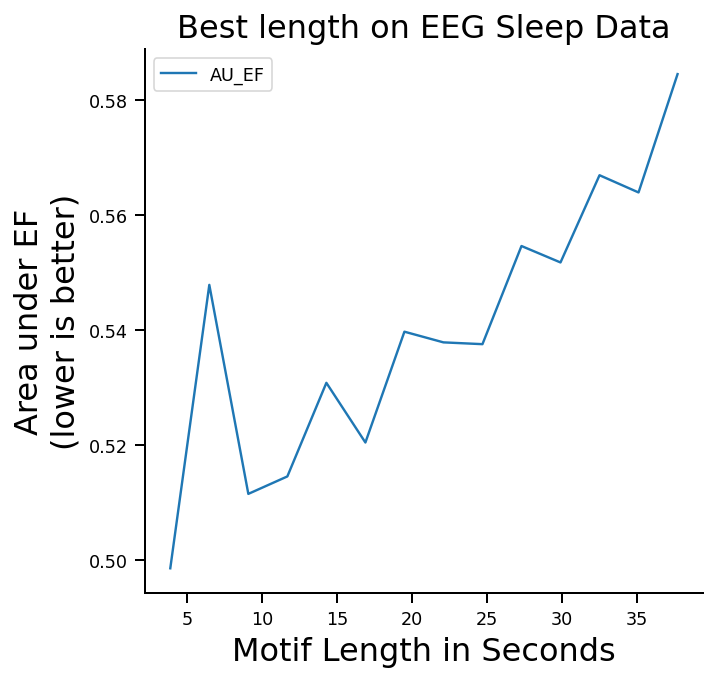

In [10]:
ks = 20
length_range = np.arange(15,151,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# k-Komplex

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:17<00:00,  1.04it/s]


Chosen window-size: 115
Identified Elbow Points [ 3 10 14 16]
Filtered Elbow Points [3, 16]


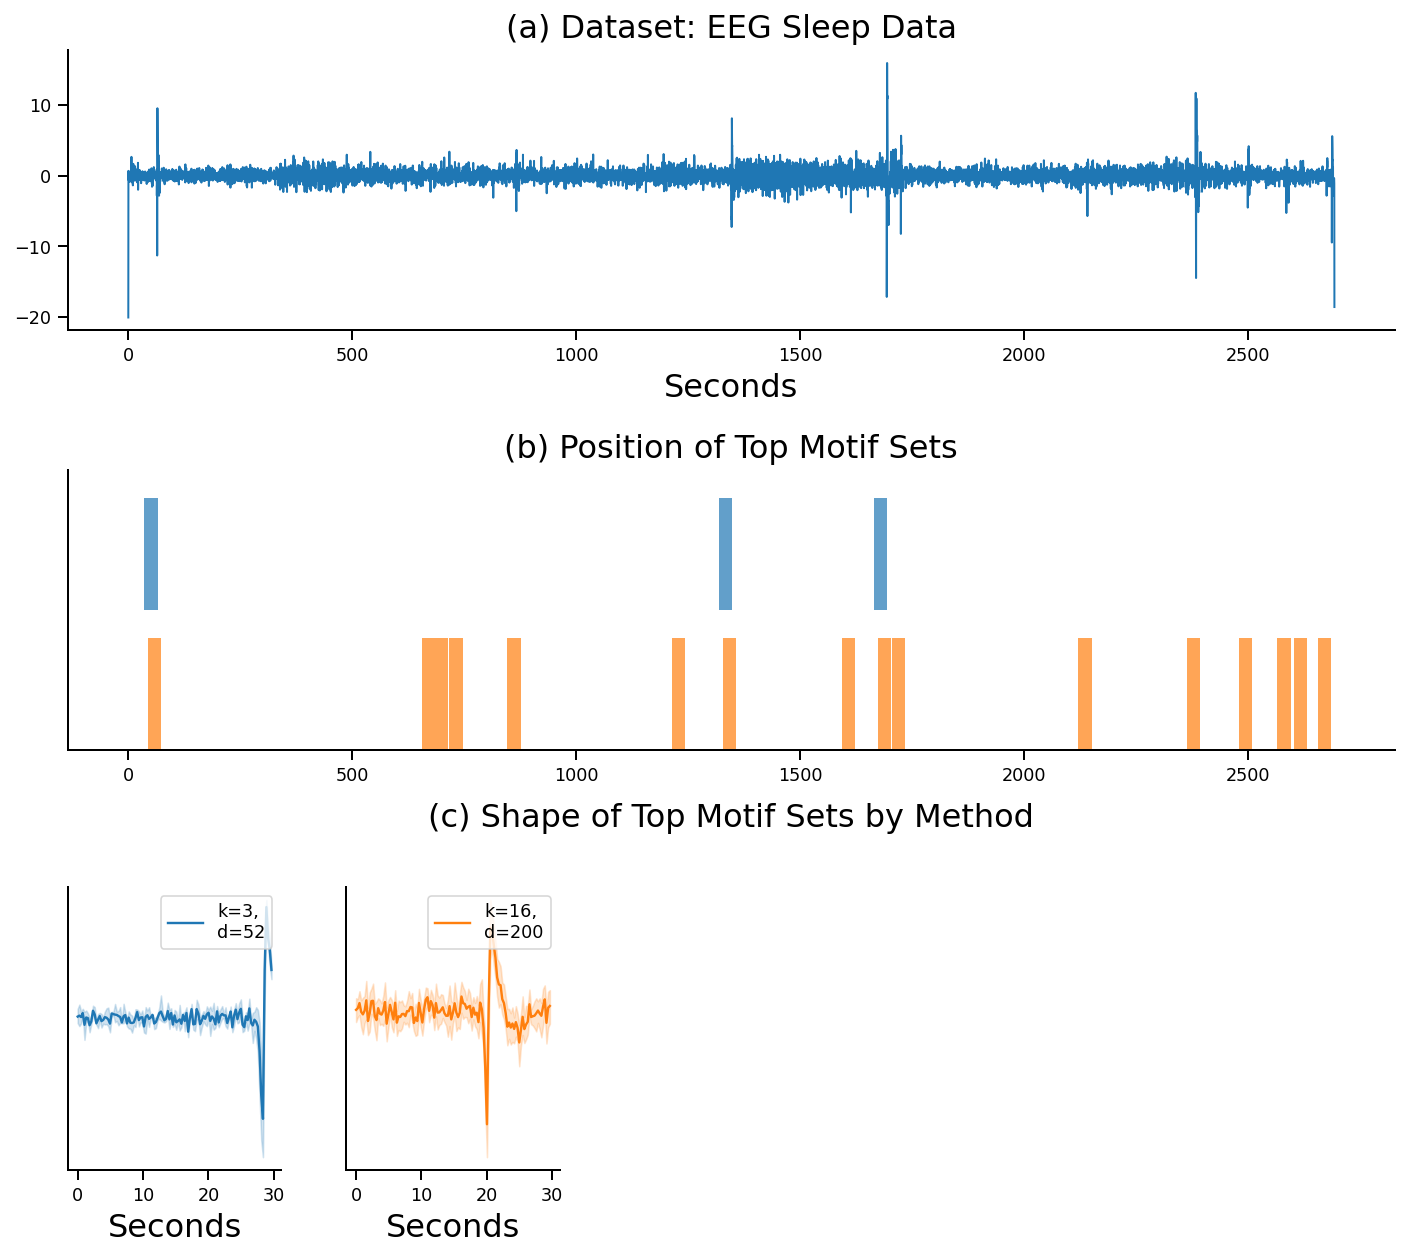

In [11]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=115, ds_name=ds_name)

# Sleep Spindles

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:16<00:00,  1.06it/s]


Chosen window-size: 25
Identified Elbow Points [ 7 13 15]
Filtered Elbow Points [7, 13, 15]


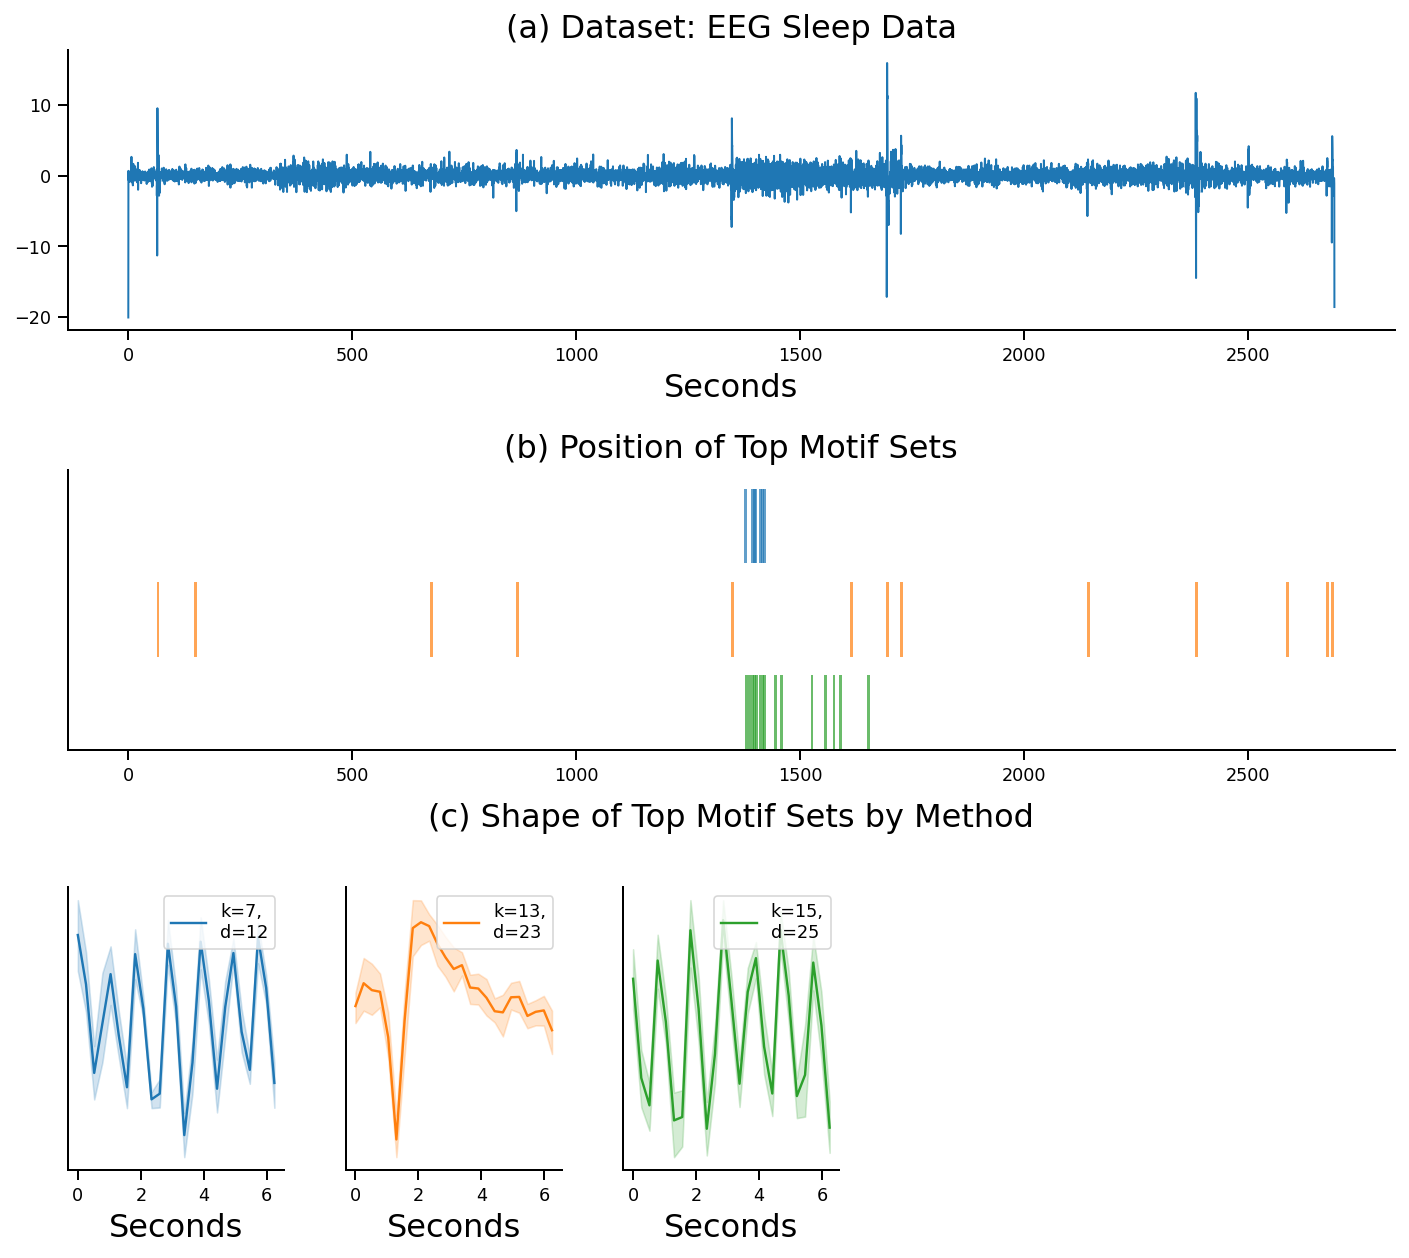

In [12]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=25, ds_name=ds_name)

<hr>

# Dataset: Winding

### References 
- [1] https://homes.esat.kuleuven.be/~tokka/daisydata.html
- [2] https://grammarviz2.github.io/grammarviz2_site/morea/motif/experience-m1.html

Dataset Original Length n:  2499
Dataset Sampled Length n:  2499


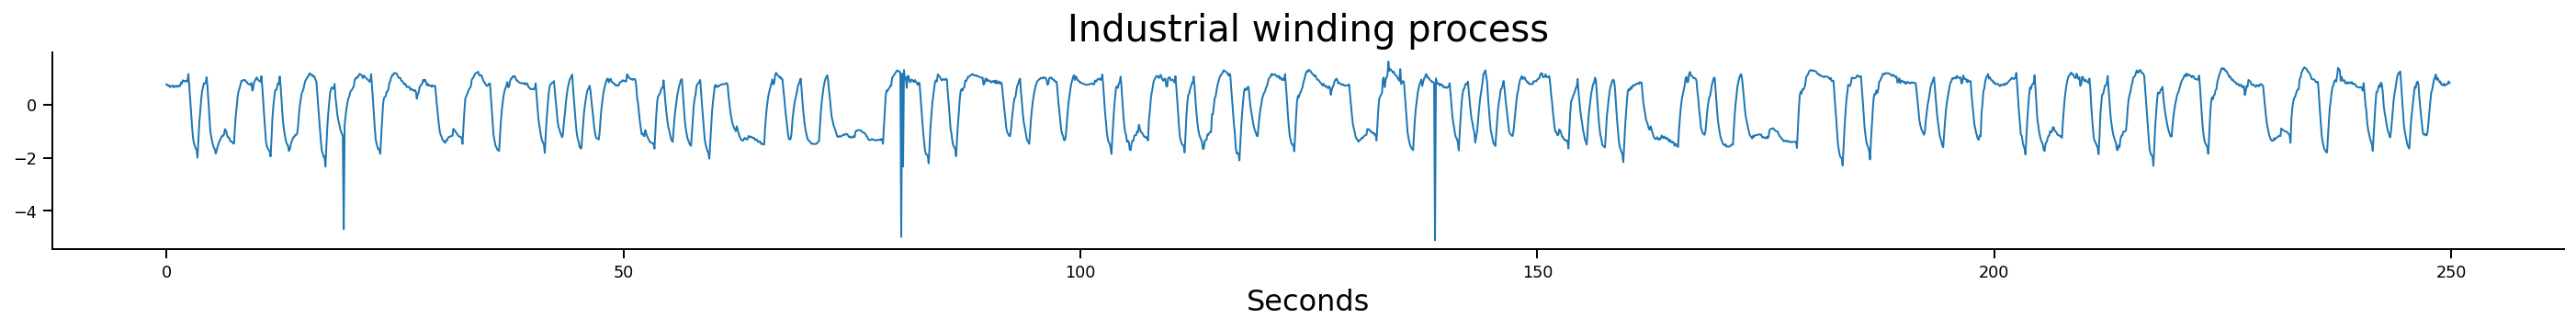

In [13]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

# Motif length selection

Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 324.34it/s]


Motif Length: 10 	 1.0 	AU_PEF: 0.391 	#Elbows: 1


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 275.96it/s]


Motif Length: 15 	 1.5 	AU_PEF: 0.442 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 275.09it/s]


Motif Length: 20 	 2.0 	AU_PEF: 0.392 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 342.45it/s]


Motif Length: 25 	 2.5 	AU_PEF: 0.31 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 284.31it/s]


Motif Length: 30 	 3.0 	AU_PEF: 0.217 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 214.66it/s]


Motif Length: 35 	 3.5 	AU_PEF: 0.266 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 214.26it/s]


Motif Length: 40 	 4.0 	AU_PEF: 0.322 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 242.15it/s]


Motif Length: 45 	 4.5 	AU_PEF: 0.346 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 174.49it/s]


Motif Length: 50 	 5.0 	AU_PEF: 0.4 	#Elbows: 2


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 184.13it/s]


Motif Length: 55 	 5.5 	AU_PEF: 0.411 	#Elbows: 2


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 146.52it/s]


Motif Length: 60 	 6.0 	AU_PEF: 0.398 	#Elbows: 4


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 133.97it/s]


Motif Length: 65 	 6.5 	AU_PEF: 0.36 	#Elbows: 3


Compute ks: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 110.72it/s]


Motif Length: 70 	 7.0 	AU_PEF: 0.404 	#Elbows: 2


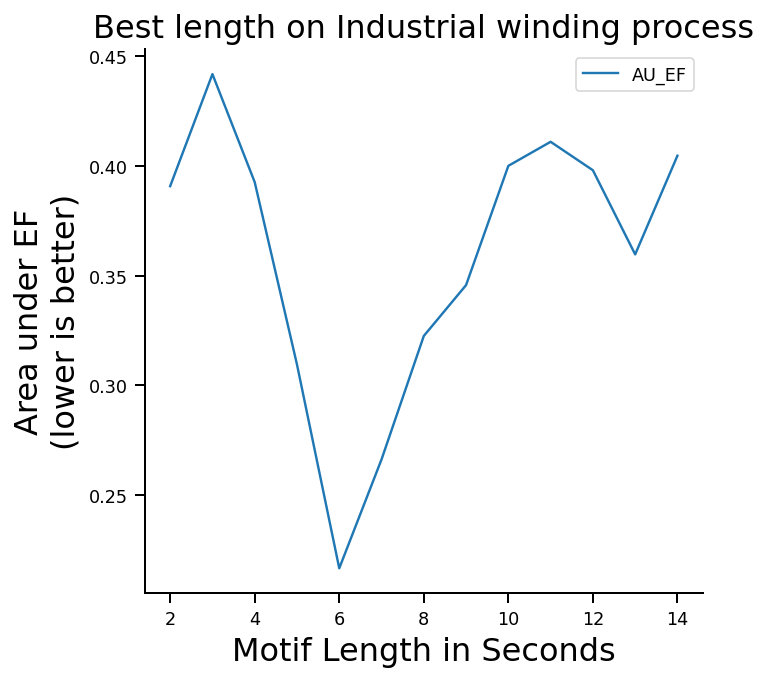

In [14]:
ks = 12
length_range = np.arange(20,150,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# Top-1 Motiflets

Compute ks: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 57.51it/s]


Chosen window-size: 60
Identified Elbow Points [ 3  6 10]
Filtered Elbow Points [6, 10]


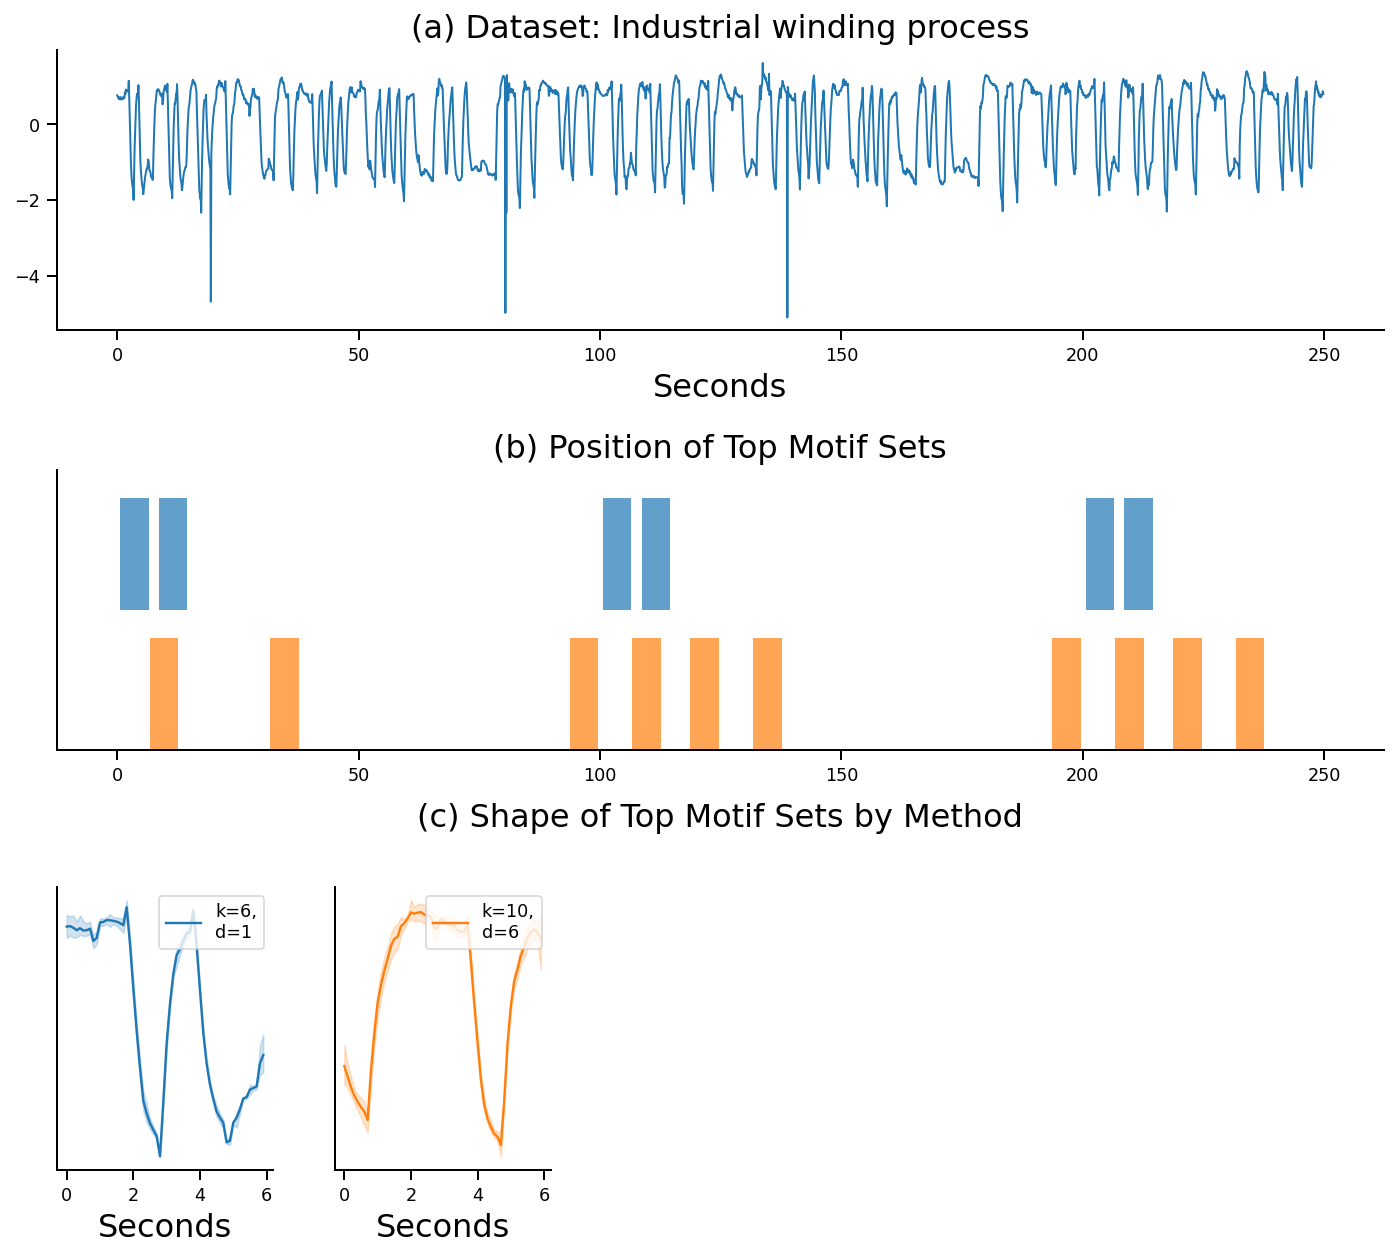

In [15]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name)

# Top-2 Motiflet

Compute ks: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 56.90it/s]


Chosen window-size: 60
Identified Elbow Points [3 6 9]
Filtered Elbow Points [3, 6, 9]


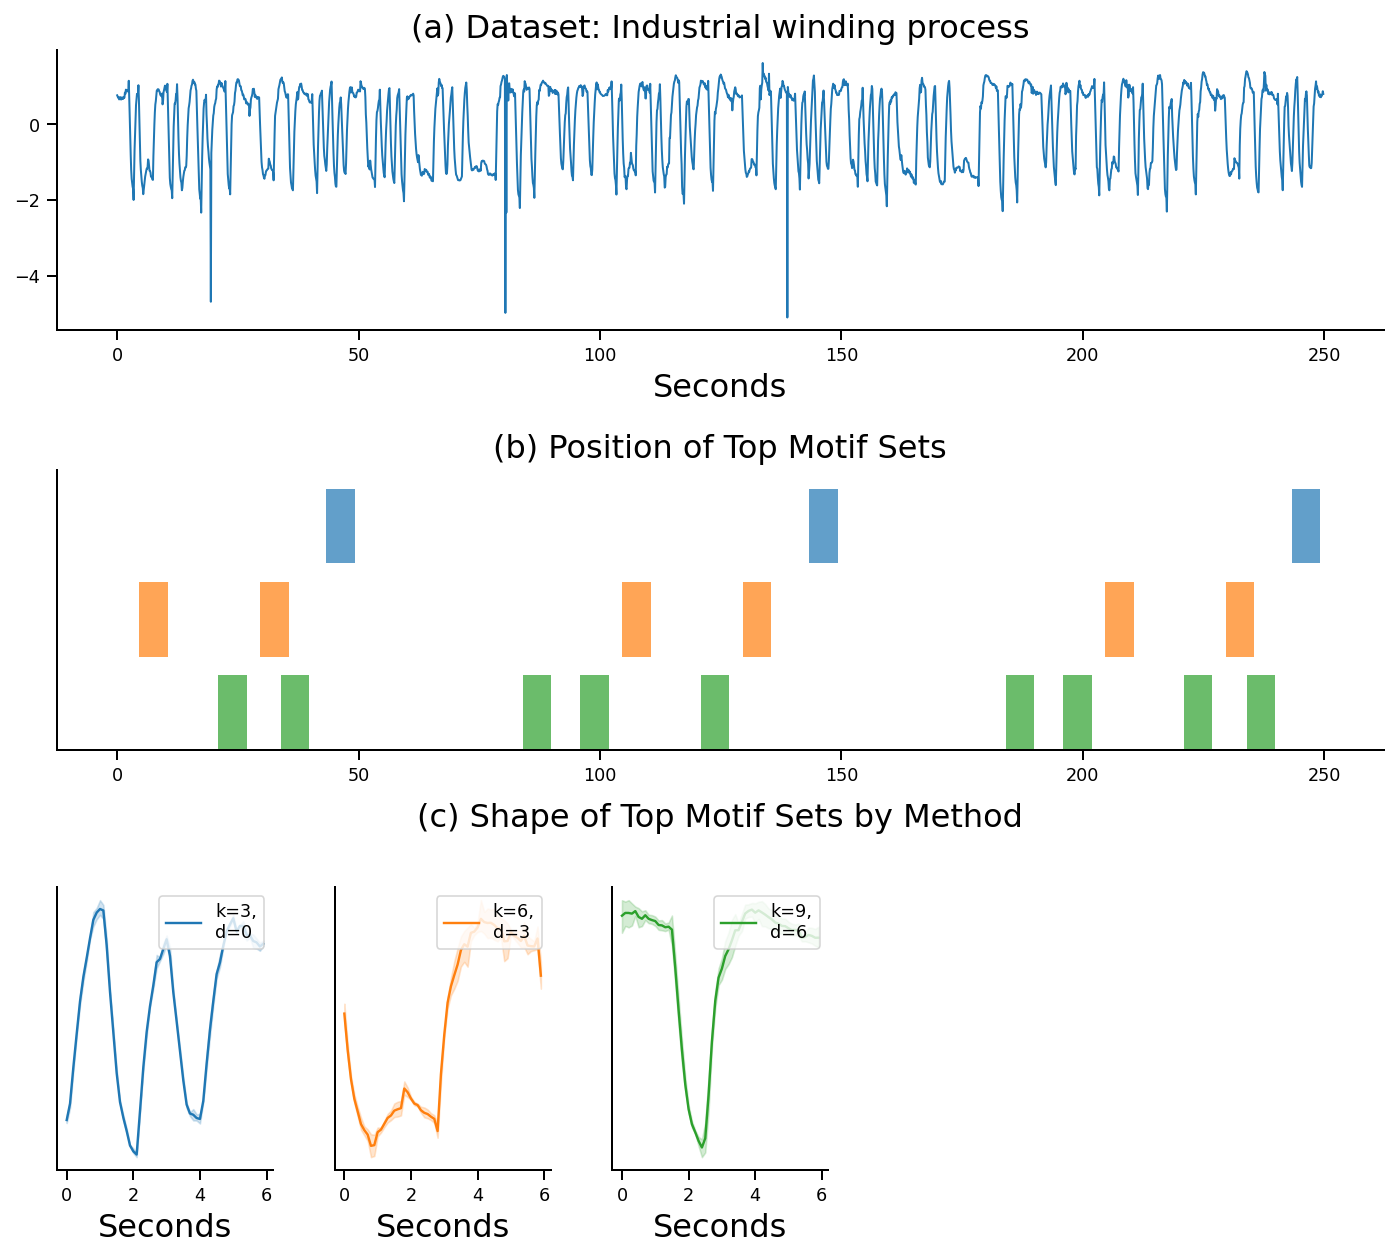

In [16]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, 
    exclusion=candidates, ds_name=ds_name)

# Motif length 130

Compute ks: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.86it/s]


Chosen window-size: 130
Identified Elbow Points [3 5 7]
Filtered Elbow Points [3, 7]


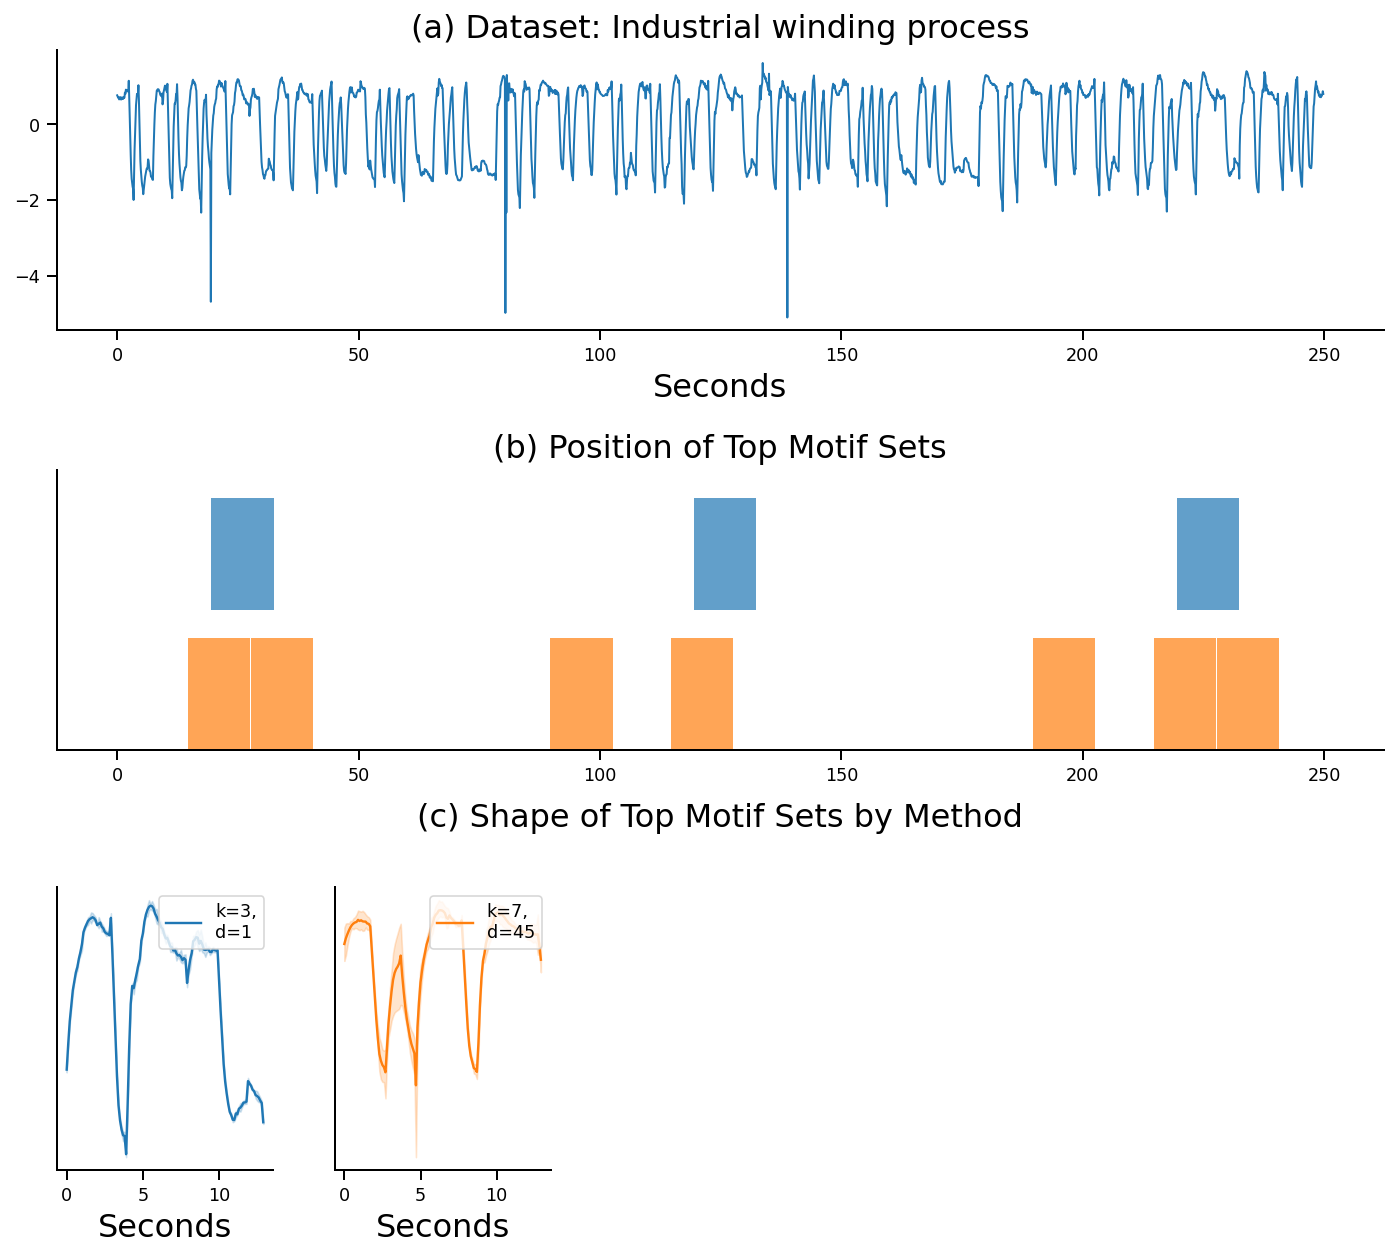

In [17]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=130, ds_name=ds_name, idx=3)

<hr>

# Dataset: fNIRS Brain Imaging

## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

Dataset Original Length n:  10401
Dataset Sampled Length n:  10401


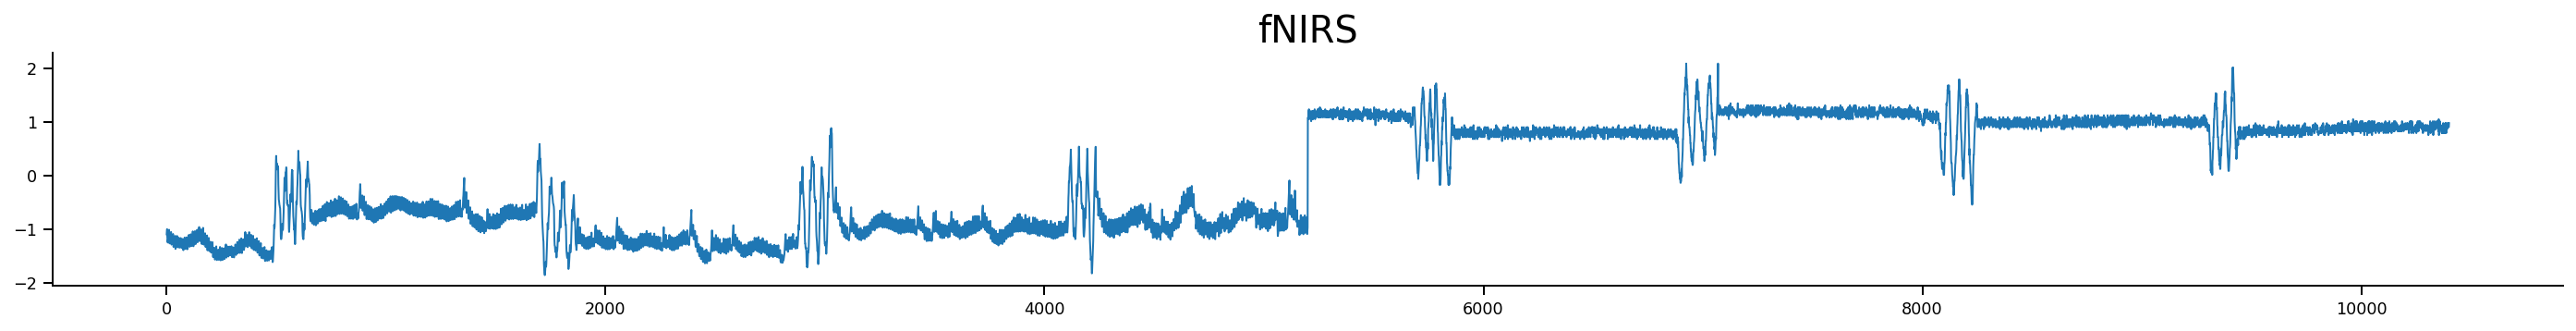

In [18]:
file = "fNIRS_subLen_600.csv" 
ds_name="fNIRS"
series = ml.read_dataset_with_index(file) 
#series = series[:5000]
plot_dataset(file, series, ds_name=ds_name)

## Motif Length Selection

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:01<00:00, 12.86it/s]


Motif Length: 25 	 25.0 	AU_PEF: 0.45 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:01<00:00, 10.67it/s]


Motif Length: 30 	 30.0 	AU_PEF: 0.432 	#Elbows: 2


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:01<00:00,  9.30it/s]


Motif Length: 35 	 35.0 	AU_PEF: 0.477 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  8.73it/s]


Motif Length: 40 	 40.0 	AU_PEF: 0.427 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.90it/s]


Motif Length: 45 	 45.0 	AU_PEF: 0.433 	#Elbows: 3


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.22it/s]


Motif Length: 50 	 50.0 	AU_PEF: 0.449 	#Elbows: 6


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.07it/s]


Motif Length: 55 	 55.0 	AU_PEF: 0.455 	#Elbows: 2


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.09it/s]


Motif Length: 60 	 60.0 	AU_PEF: 0.44 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.09it/s]


Motif Length: 65 	 65.0 	AU_PEF: 0.457 	#Elbows: 4


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.65it/s]


Motif Length: 70 	 70.0 	AU_PEF: 0.437 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.82it/s]


Motif Length: 75 	 75.0 	AU_PEF: 0.459 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.28it/s]


Motif Length: 80 	 80.0 	AU_PEF: 0.459 	#Elbows: 2


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.40it/s]


Motif Length: 85 	 85.0 	AU_PEF: 0.483 	#Elbows: 3


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.07it/s]


Motif Length: 90 	 90.0 	AU_PEF: 0.456 	#Elbows: 6


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:03<00:00,  5.82it/s]


Motif Length: 95 	 95.0 	AU_PEF: 0.45 	#Elbows: 5


Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:03<00:00,  5.92it/s]


Motif Length: 100 	 100.0 	AU_PEF: 0.453 	#Elbows: 3


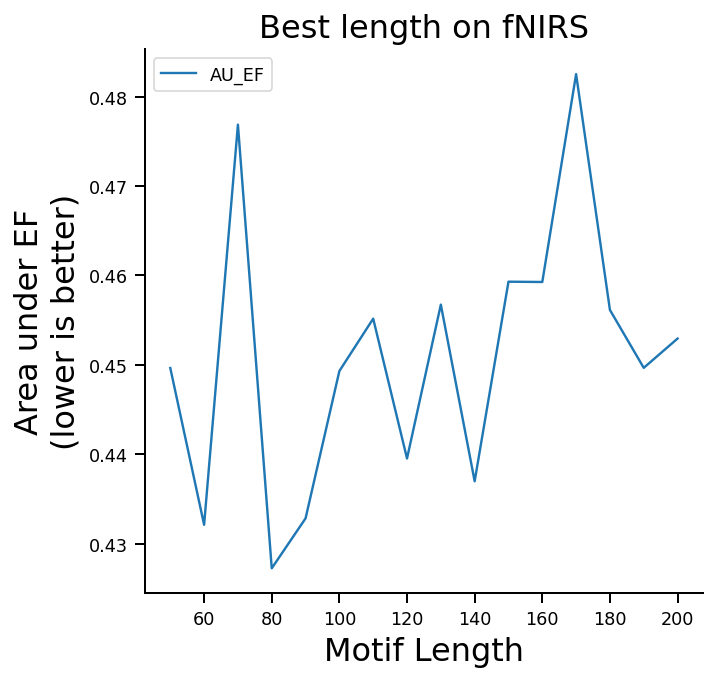

In [19]:
ks = 20
length_range = np.arange(50,201,10)
motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, 
    ds_name=ds_name)

# Top-1 k-Motiflets

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:08<00:00,  2.15it/s]


Chosen window-size: 80
Identified Elbow Points [ 4  7 12 17]
Filtered Elbow Points [4, 17]


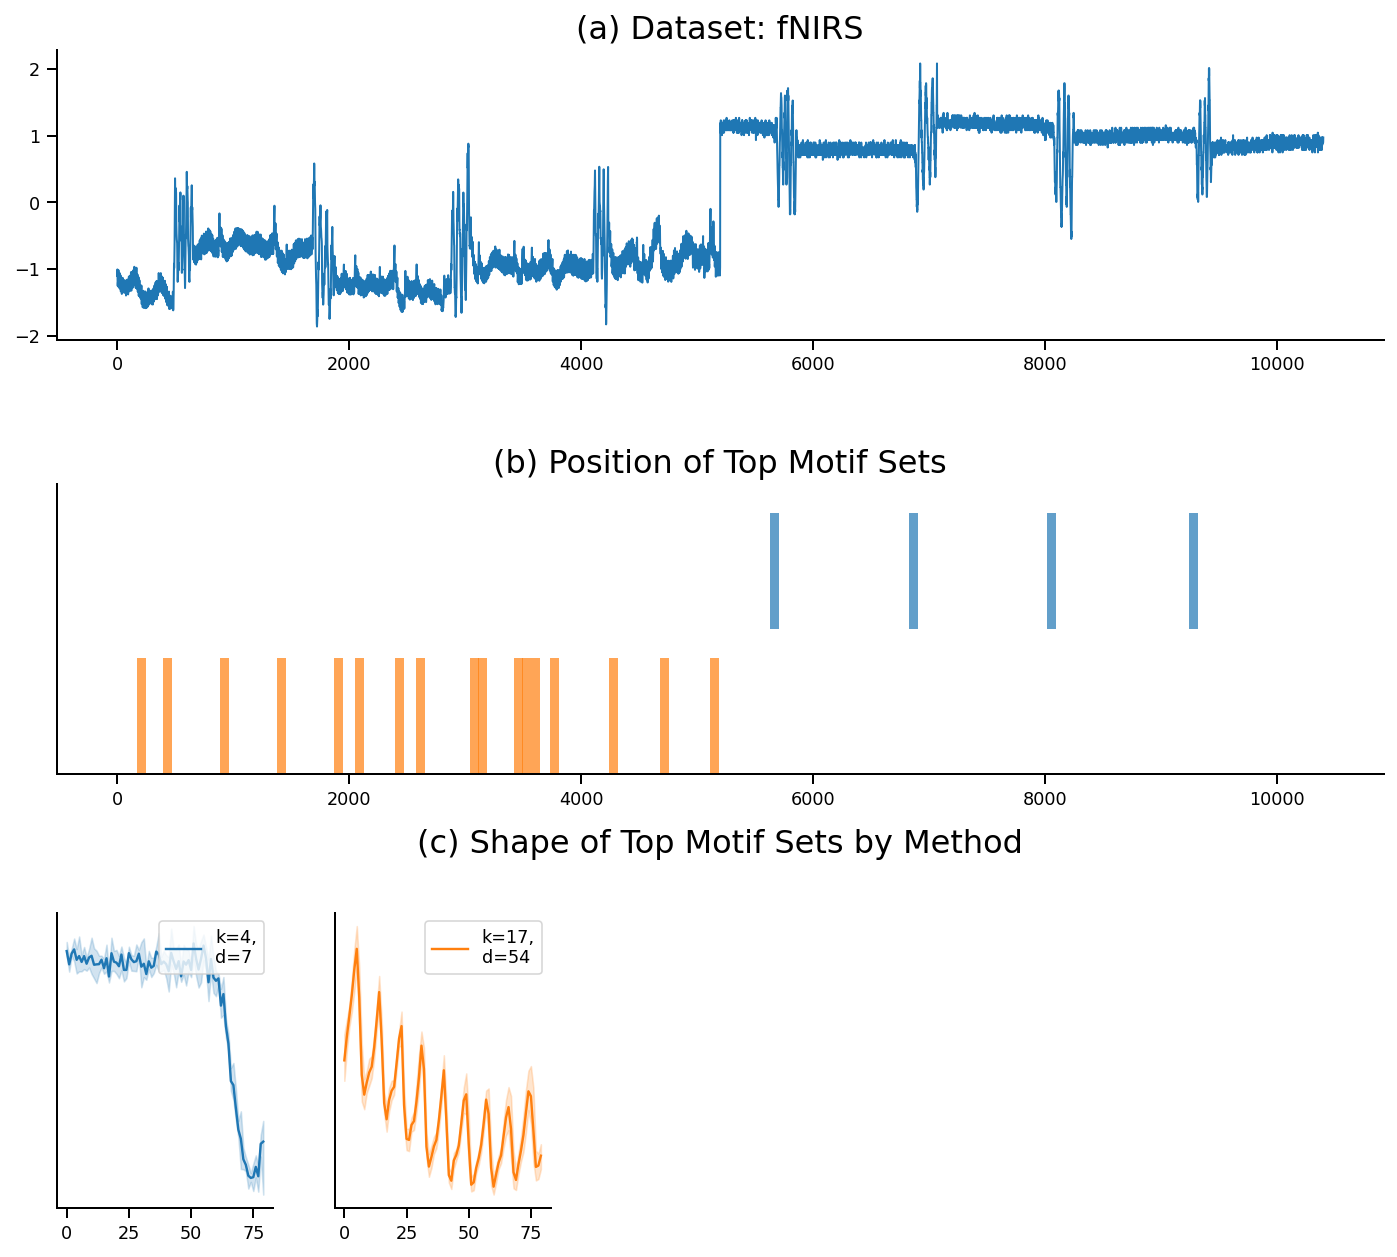

In [20]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name, filter=True)

# Top-2 k-Motiflets

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:08<00:00,  2.10it/s]


Chosen window-size: 80
Identified Elbow Points [ 4  7 12 17]
Filtered Elbow Points [4, 17]


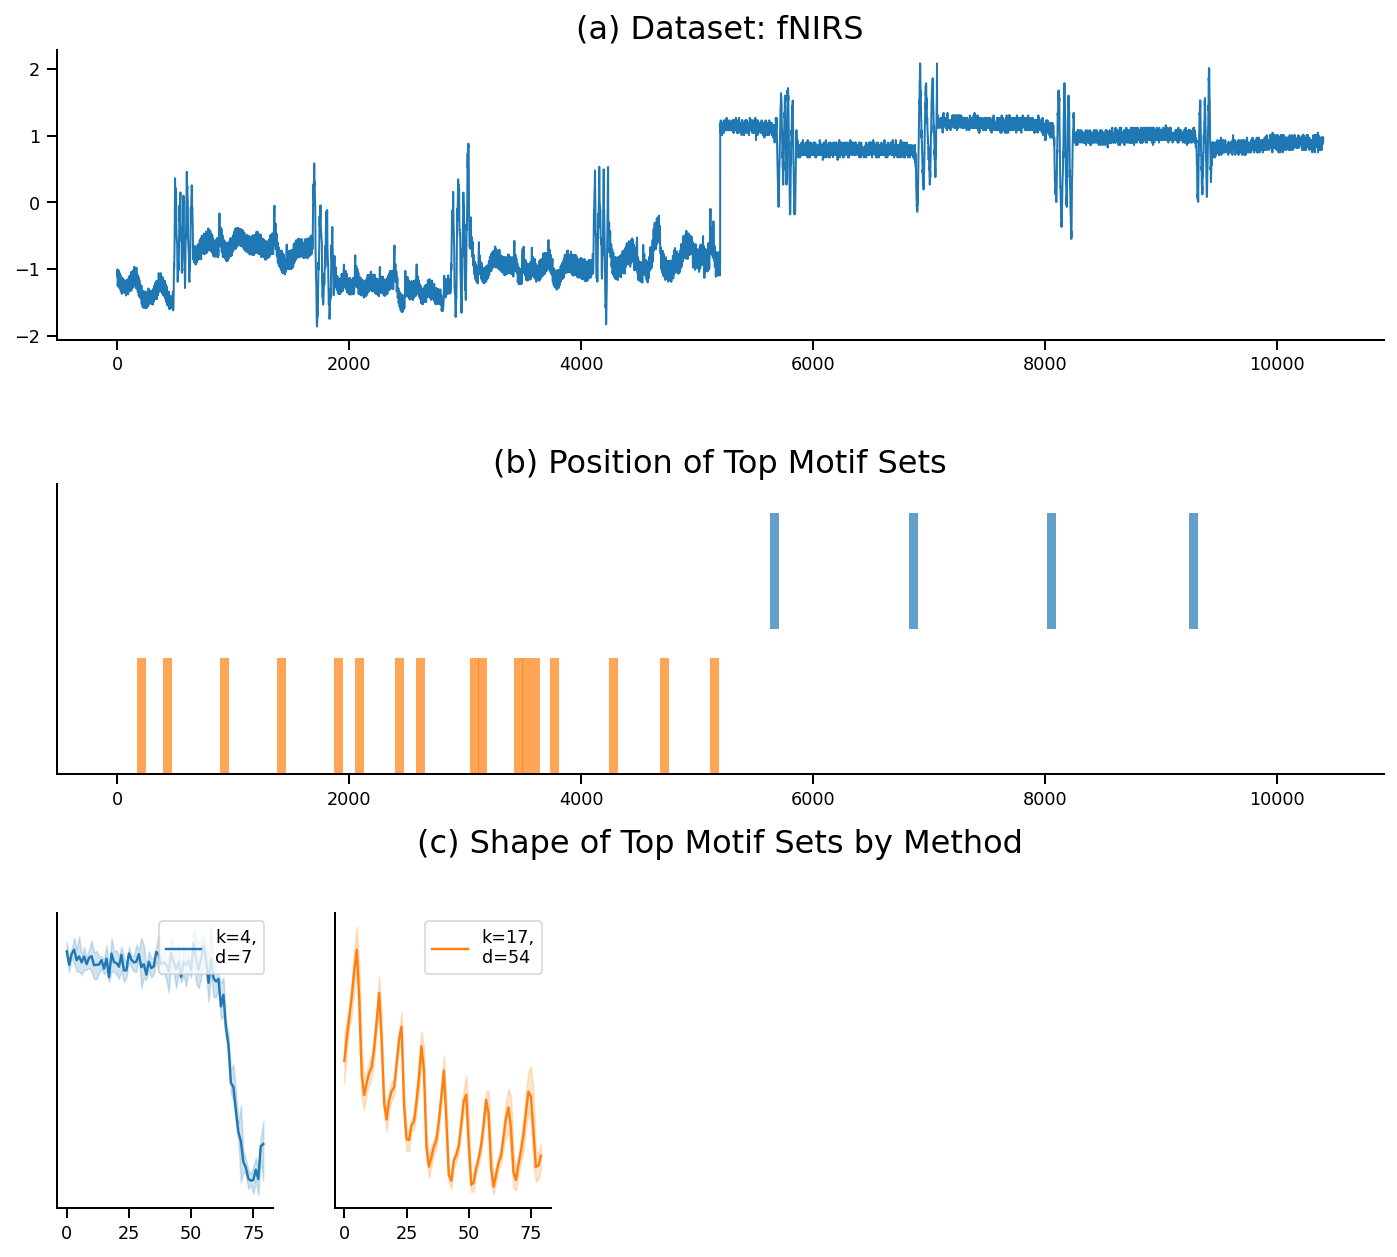

In [21]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=80, ds_name=ds_name, idx=3, filter=True)

Compute ks: 100%|██████████████████████████████████████████████████| 18/18 [00:08<00:00,  2.23it/s]


Chosen window-size: 80
Identified Elbow Points [ 3 10 13 15 18]
Filtered Elbow Points [13, 15, 18]


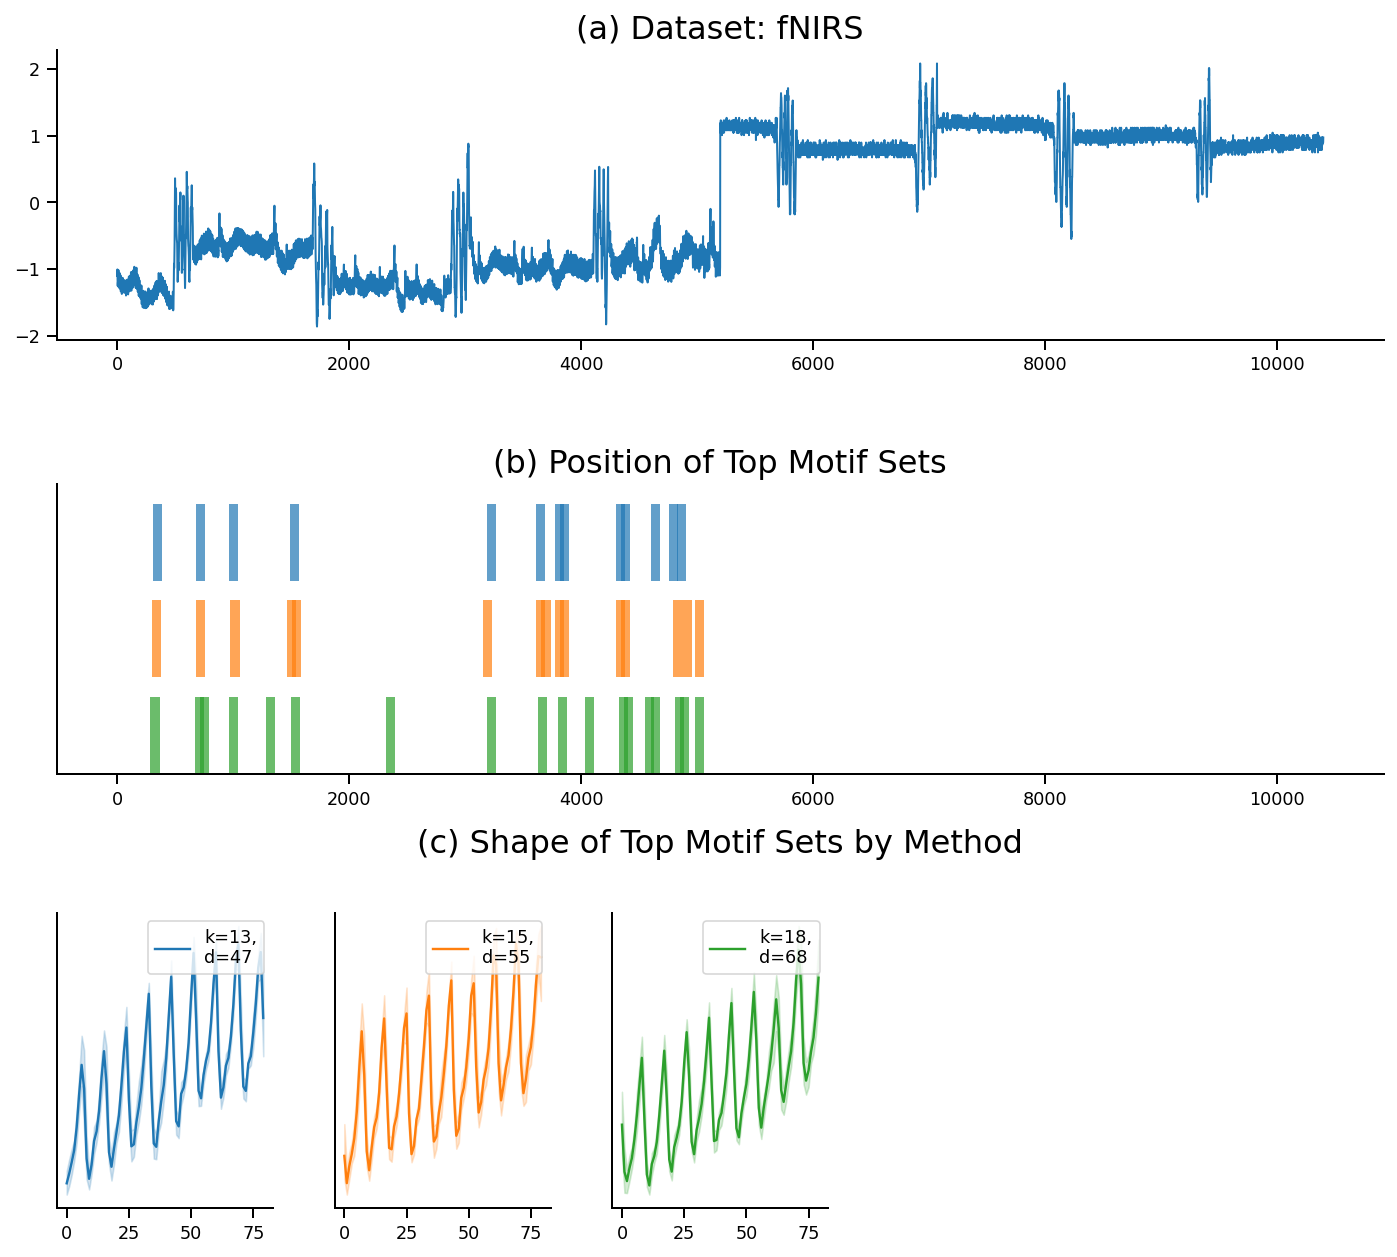

In [22]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=80, ds_name=ds_name, exclusion=candidates, filter=True)